## **MODELO 1**
Pronostico demanda de la compañia Cementos Argos.


### **LIBRERIAS**

In [119]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### **DATA**

In [120]:
path_base = os.path.abspath(os.path.join(os.getcwd(),'..'))
path_data = os.path.join(path_base,'data','input','dataset_demand_acumulate.csv')

demand_data = pd.read_csv(path_data)
demand_data.head(10)

,year_month,Demand
0,2017-01,1211.009490
1,2017-02,1660.584649
2,2017-03,3182.587014
3,2017-04,3506.515270
4,2017-05,4554.082280
5,2017-06,4839.985446
6,2017-07,5125.888612
7,2017-08,5783.904183
8,2017-09,6464.990697
9,2017-10,7196.386224


In [121]:
demand_data['year_month'] = pd.to_datetime(demand_data['year_month'])

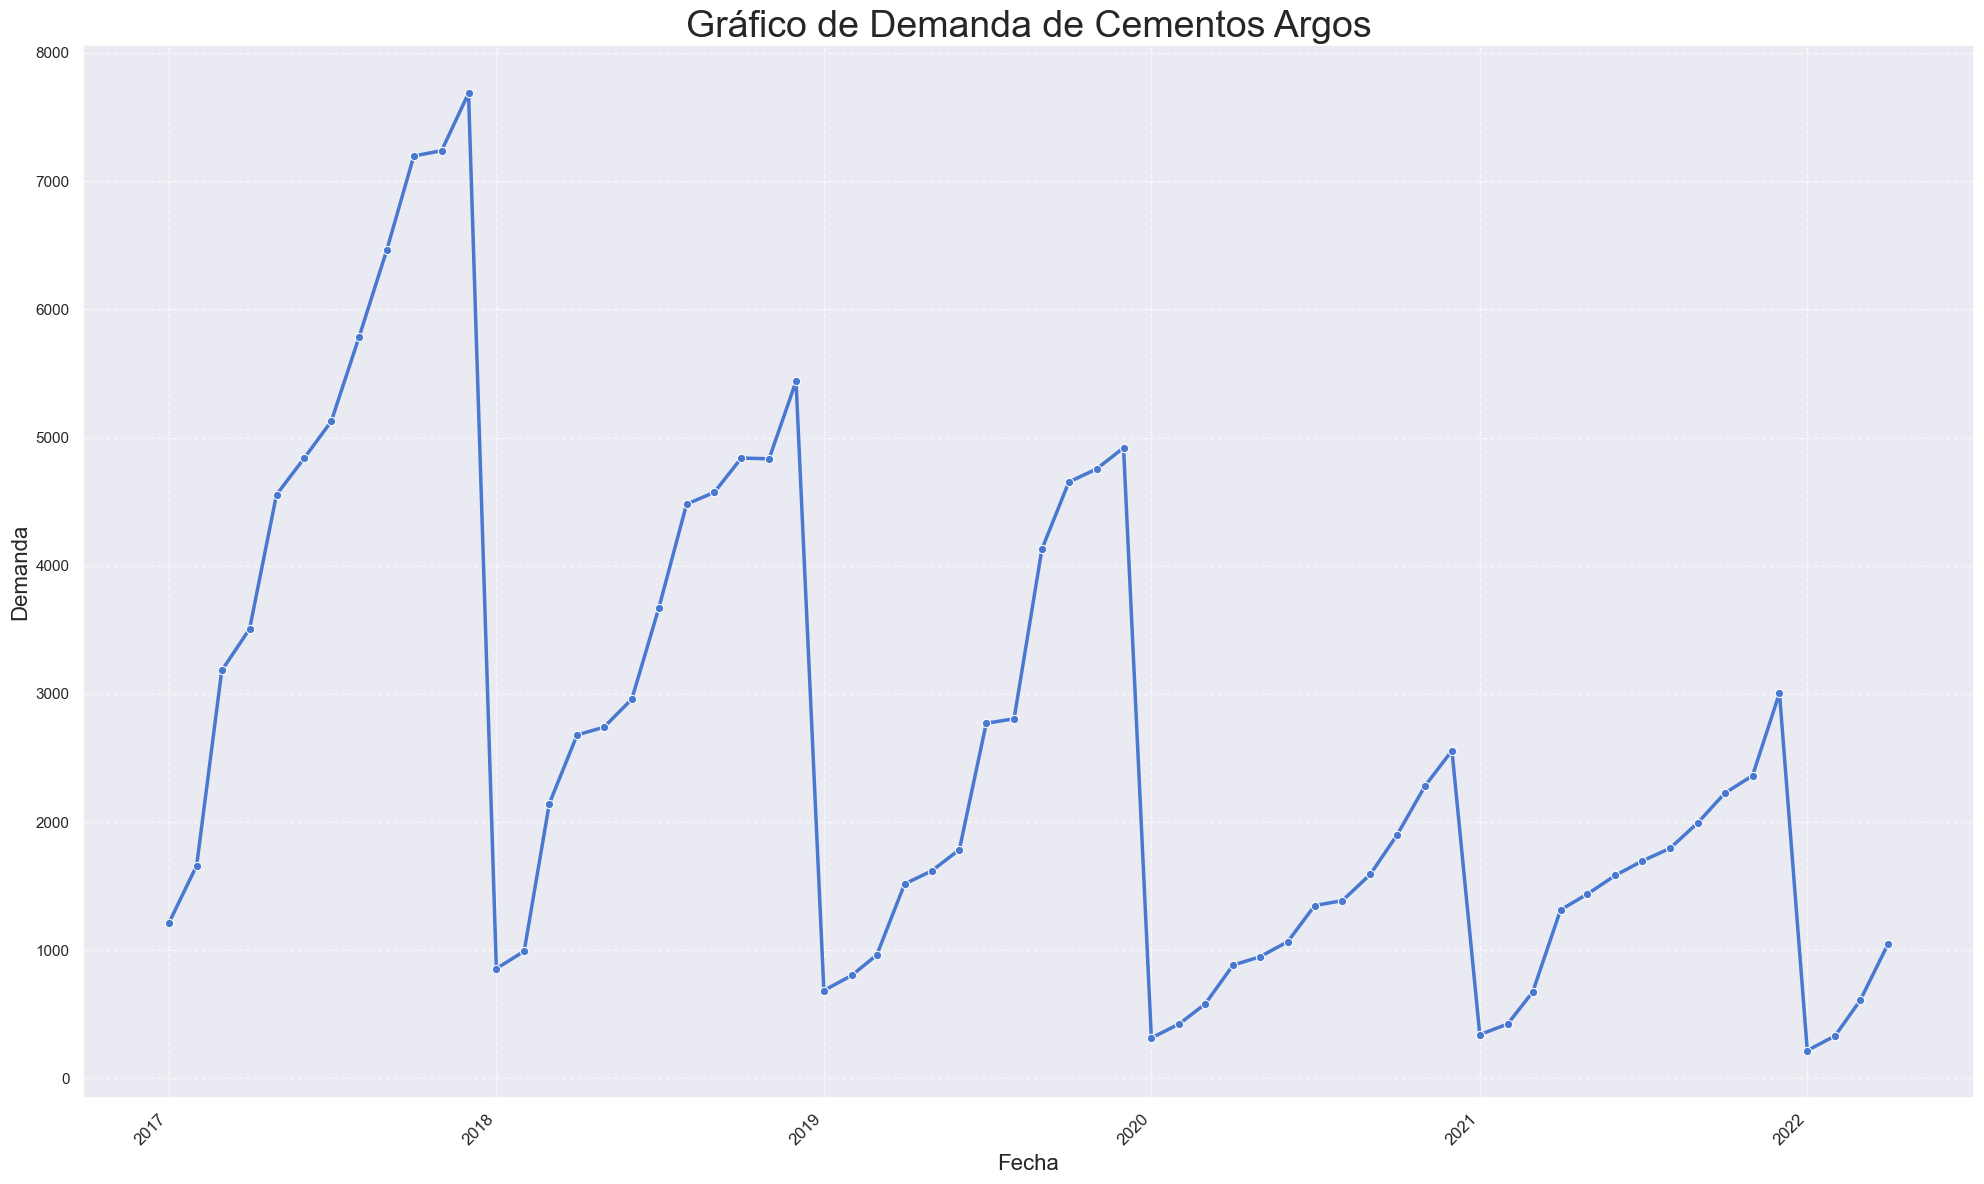

In [122]:
sns.set(style="darkgrid", palette="muted")
plt.figure(figsize=(20, 12))
sns.lineplot(data=demand_data, x='year_month', y='Demand', marker='o', linewidth=2.5)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Fecha', fontsize=16)
plt.ylabel('Demanda', fontsize=16)
plt.title('Gráfico de Demanda de Cementos Argos', fontsize=27)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [123]:
import scipy

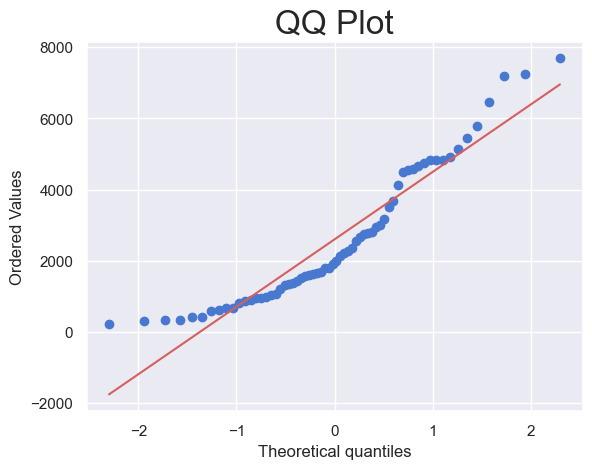

In [124]:
scipy.stats.probplot(demand_data.Demand, plot= plt)
plt.title("QQ Plot",size=24)
plt.show()

El grafico anterior nos muestra que los datos no siguen una distribución normal, lo que es común en una serie de tiempo

In [125]:
demand_data = demand_data.set_index("year_month",drop=True)

In [126]:
demand_data

,Demand
year_month,
2017-01-01,1211.009490
2017-02-01,1660.584649
2017-03-01,3182.587014
2017-04-01,3506.515270
2017-05-01,4554.082280
...,...
2021-12-01,3006.311107
2022-01-01,217.314949
2022-02-01,332.062614


## **MODEL**

In [127]:
size = int(len(demand_data)*0.90)
df_train = demand_data.iloc[:size]
df_test = demand_data.iloc[size:]


In [128]:
from statsmodels.tsa.arima.model import ARIMA

In [129]:
model_arima = ARIMA(df_train, order=(18,0,0))
results_arima = model_arima.fit()
results_arima.summary()

c:\Users\dberrio30\OneDrive - Cementos Argos S.A\Grabaciones\Nueva carpeta\Proyecto Finanzas\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dberrio30\OneDrive - Cementos Argos S.A\Grabaciones\Nueva carpeta\Proyecto Finanzas\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dberrio30\OneDrive - Cementos Argos S.A\Grabaciones\Nueva carpeta\Proyecto Finanzas\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dberrio30\OneDrive - Cementos Argos S.A\Grabaciones\Nueva carpeta\Proyecto Finanzas\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceW

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Demand   No. Observations:                   57
Model:                ARIMA(18, 0, 0)   Log Likelihood                -467.949
Date:                Mon, 02 Dec 2024   AIC                            975.897
Time:                        23:21:58   BIC                           1016.759
Sample:                    01-01-2017   HQIC                           991.777
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2747.4204   2279.624      1.205      0.228   -1720.561    7215.402
ar.L1          0.9448      0.162      5.835      0.000       0.627       1.262
ar.L2         -0.0951      0.179     -0.530      0.596      -0.447       0.256
ar.L3          0.0141      0.216      0.065      0.948      -0.410       0.438
ar.L4         -0.0882      0.179     -0.493      0.622      -0.439       0.263
ar.L5          0.2149      0.206      1.043      0.297      -0.189       0.619
ar.L6         -0.1109      0.164     -0.678      0.498      -0.431       0.210
ar.L7         -0.0076      0.050     -0.150      0.880      -0.106       0.091
ar.L8         -0.0267      0.046     -0.575      0.565      -0.118       0.064
ar.L9          0.0420      0.039      1.091      0.275      -0.033       0.117
ar.L10        -0.0546      0.050     -1.096      0.273      -0.152       0.043
ar.L11         0.0221      0.049      0.448      0.654      -0.075       0.119
ar.L12         0.9616      0.039     24.483      0.000       0.885       1.039
ar.L13        -0.8827      0.163     -5.403      0.000      -1.203      -0.563
ar.L14         0.1002      0.171      0.587      0.557      -0.234       0.435
ar.L15        -0.0590      0.185     -0.318      0.750      -0.422       0.304
ar.L16         0.1449      0.158      0.915      0.360      -0.165       0.455
ar.L17        -0.2619      0.166     -1.576      0.115      -0.588       0.064
ar.L18         0.1261      0.130      0.968      0.333      -0.129       0.381
sigma2      1.335e+05   1.57e+04      8.485      0.000    1.03e+05    1.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 7.55
Prob(Q):                              0.62   Prob(JB):                         0.02
Heteroskedasticity (H):               1.41   Skew:                             0.49
Prob(H) (two-sided):                  0.46   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [130]:
start_date = df_test.index[0]
end_date = df_test.index[len(df_test)-1]

In [131]:
df_pred_arima = results_arima.predict(start=start_date, end=end_date)

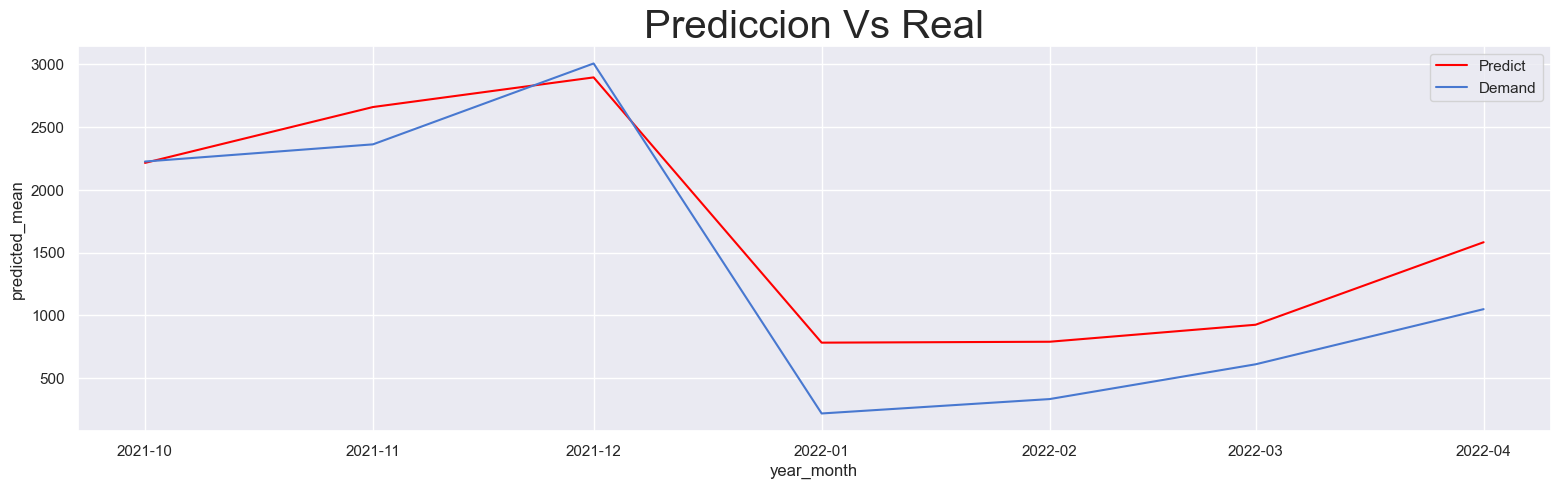

In [132]:
plt.figure(figsize=(19,5))
sns.lineplot(data=df_pred_arima, label='Predict', color='red')
sns.lineplot(data=df_test, color='blue')
plt.title('Prediccion Vs Real',fontsize=(29))
plt.legend()
plt.show()

In [133]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [134]:
r2 = r2_score(df_test,df_pred_arima)
msre = mean_squared_error(df_test, df_pred_arima)
mae = mean_absolute_error(df_test,df_pred_arima)

print(round(r2,2))
print(round(msre,2))
print(round(mae,2))

0.86
144532.09
326.97


In [135]:
start_forecast = '2022-05-01'
end_forecast = '2022-07-01'

forecast_df = results_arima.predict(start=start_forecast,end= end_forecast)

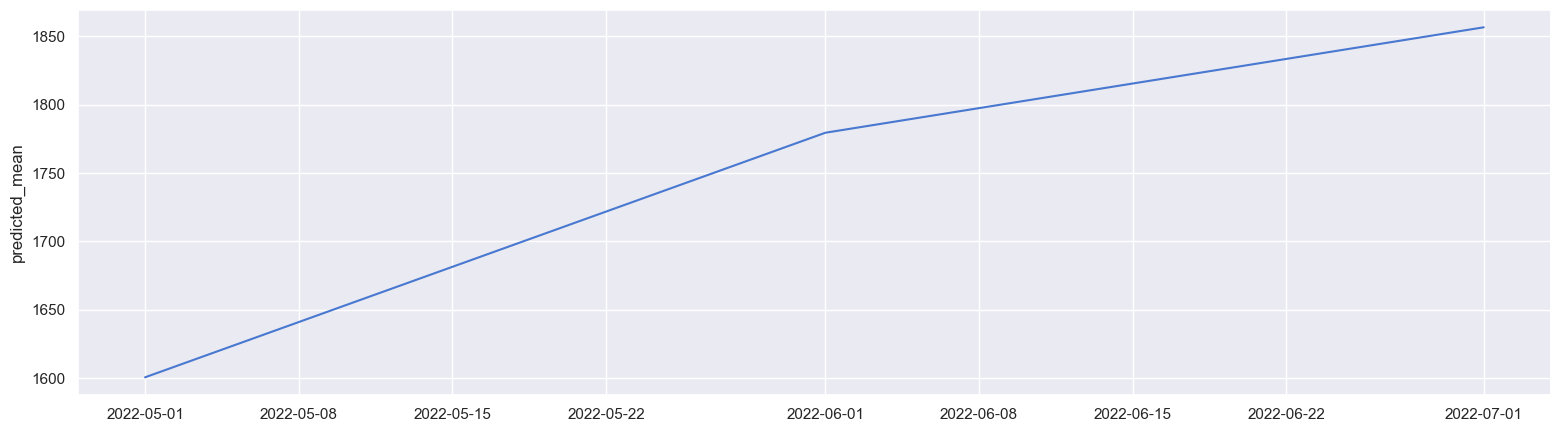

In [136]:
plt.figure(figsize=(19,5))
sns.lineplot(forecast_df)
plt.show()

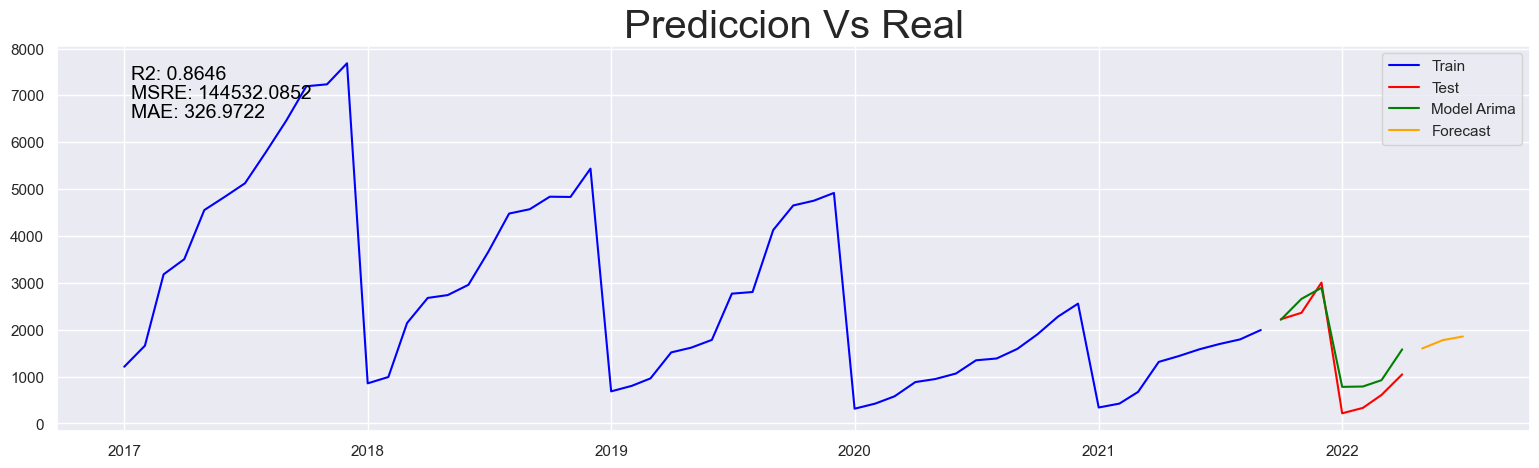

In [137]:
plt.figure(figsize=(19,5))
plt.plot(df_train, label='Train', color= 'blue')
plt.plot(df_test, label='Test', color='red')
plt.plot(df_pred_arima, label='Model Arima', color='green')
plt.plot(forecast_df,label='Forecast',color='orange')
plt.title('Prediccion Vs Real',fontsize=(29))
plt.text(0.05, 0.95, f'R2: {r2:.4f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', color='black')
plt.text(0.05, 0.90, f'MSRE: {msre:.4f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', color='black')
plt.text(0.05, 0.85, f'MAE: {mae:.4f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', color='black')
plt.legend()
plt.show()

In [138]:
forecast_df.rename('Demand',inplace=True)
data_total = pd.concat([demand_data,forecast_df])

In [ ]:
path_output = os.path.join(path_base,'data','output')
data_total.to_excel(path_output + 'Data_total.xlsx')